## Escuela de Ingeniería en Computación, ITCR

## Aprendizaje automático


### Tarea programada 04 NLP y clustering


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo .zip que contenga los datos o referencia a estos, un
documento en formato Jupyter notebook con todas las secciones solicitadas y código bien
documentado.

Modo de trabajo: Individual o en grupos de máximo dos personas.

Estudiante: Gabriel Valentine Fonseca

---


In [2]:
# bibliotecas requeridas

import numpy as np
import pandas as pd
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Ejercicio 1 - Clustering


1.   Obtenga el conjunto de datos.



Los datos encontrados corresponden a indicadores de demografía, salud, educación y tranporte de Costa rica entre 1950 y 2023 obtenidos del Global Urban Observatory parte del United Nations Human Settlement Programmes.

In [4]:
#cargar los datos de google drive
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Tareas/Tarea 04 - NLP & clustering/indicator_data_cr.csv'

df = pd.read_csv(archivo, header = 0, delimiter =',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,category,indicator,indicator_friendly,type_data,latitude,longitude,region_id,country_id,name,year,value
0,#meta+category,#indicator+name,#indicator+description,#indicator+type,#geo+lat,#geo+lon,#region+code,#country+code+v_iso2,#country+name,#date+year,#indicator+value
1,Population,avg_annual_rate_change_percentage_urban,Average annual rate of change of population – ...,p,10,-84,389,CR,Costa rica,1985,2.13
2,Population,avg_annual_rate_change_percentage_urban,Average annual rate of change of population – ...,p,10,-84,389,CR,Costa rica,1955,0.23
3,Population,avg_annual_rate_change_percentage_urban,Average annual rate of change of population – ...,p,10,-84,389,CR,Costa rica,2020,0.66
4,Population,avg_annual_rate_change_percentage_urban,Average annual rate of change of population – ...,p,10,-84,389,CR,Costa rica,1990,1.92





2.   Preprocese, limpie y visualice los datos para conocerlos utilizando los métodos vistos en
clase u otros.

In [6]:
#Primero, eliminar columnas y la primera fila que no aportan información para el ejercicio

df = df.iloc[1:]
columns_to_drop = ['indicator_friendly', 'type_data', 'latitude', 'longitude', 'region_id', 'country_id']
df = df.drop(columns=columns_to_drop)

df.head()


,category,indicator,name,year,value
2,Population,avg_annual_rate_change_percentage_urban,Costa rica,1955,0.23
3,Population,avg_annual_rate_change_percentage_urban,Costa rica,2020,0.66
4,Population,avg_annual_rate_change_percentage_urban,Costa rica,1990,1.92
5,Population,avg_annual_rate_change_percentage_urban,Costa rica,1960,0.88
6,Population,avg_annual_rate_change_percentage_urban,Costa rica,2025,0.61


In [7]:
# Preprocesamiento de variables categóricas
label_encoder = LabelEncoder()
df["category"] = label_encoder.fit_transform(df["category"])
df["indicator"] = label_encoder.fit_transform(df["indicator"])
df["name"] = label_encoder.fit_transform(df["name"])

# Escalado de las variables numéricas
scaler = StandardScaler()
df[["year", "value"]] = scaler.fit_transform(df[["year", "value"]])

3. Seleccione las variables a utilizar en el ejercicio (al menos cinco variables). Documente
el motivo de la selección de acuerdo al problema en estudio.

In [8]:
# Las 5 variables a utilizar fueron escogidas en el punto anterior

4. Utilice los tres algoritmos de clustering para caracterizar los datos usando las variables
seleccionadas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


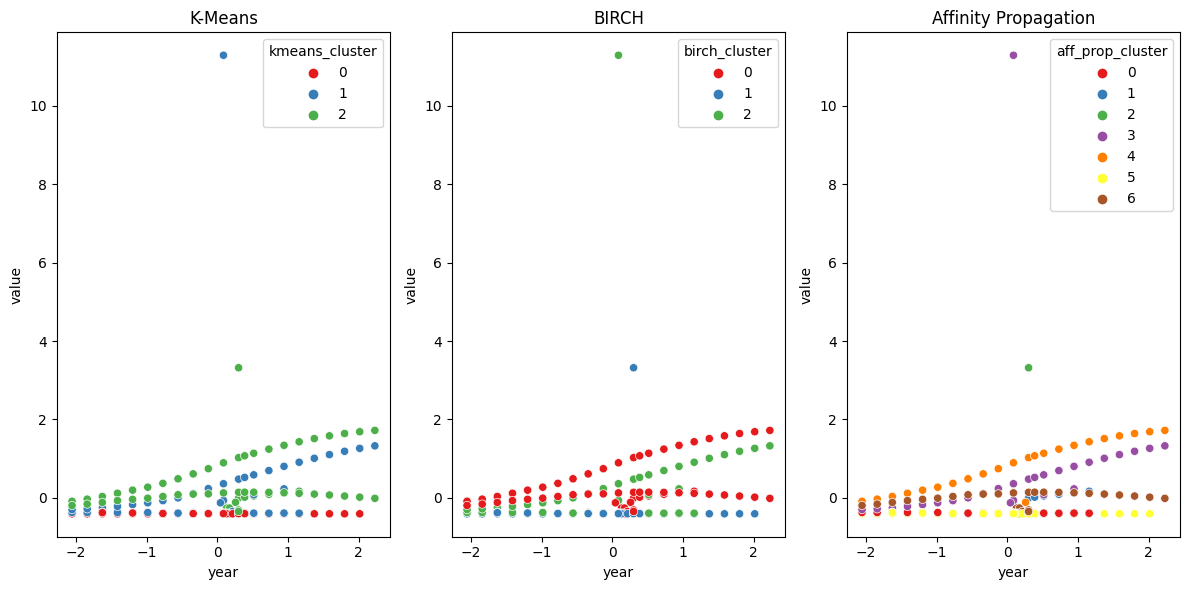

In [22]:
#K means
clusters = 3 #numero de clusters
kmeans = KMeans(n_clusters=clusters, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(df)

#birch
birch = Birch()
df["birch_cluster"] = birch.fit_predict(df)

#Affinity Propagation
aff_prop = AffinityPropagation()
df["aff_prop_cluster"] = aff_prop.fit_predict(df)

#se comparan mediante scatterplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="year", y="value", hue="kmeans_cluster", palette="Set1")
plt.title("K-Means")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="year", y="value", hue="birch_cluster", palette="Set1")
plt.title("BIRCH")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="year", y="value", hue="aff_prop_cluster", palette="Set1")
plt.title("Affinity Propagation")

plt.tight_layout()
plt.show()






5. Utilice métodos de ajuste de parámetros, por ejemplo, el método del codo para
seleccionar el mejor K para el algoritmo K-Means o el Coeficiente de Silueta y vuelva a
ejecutar el algoritmo usando los parámetros recomendados. Realice esto con todos los
algoritmos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

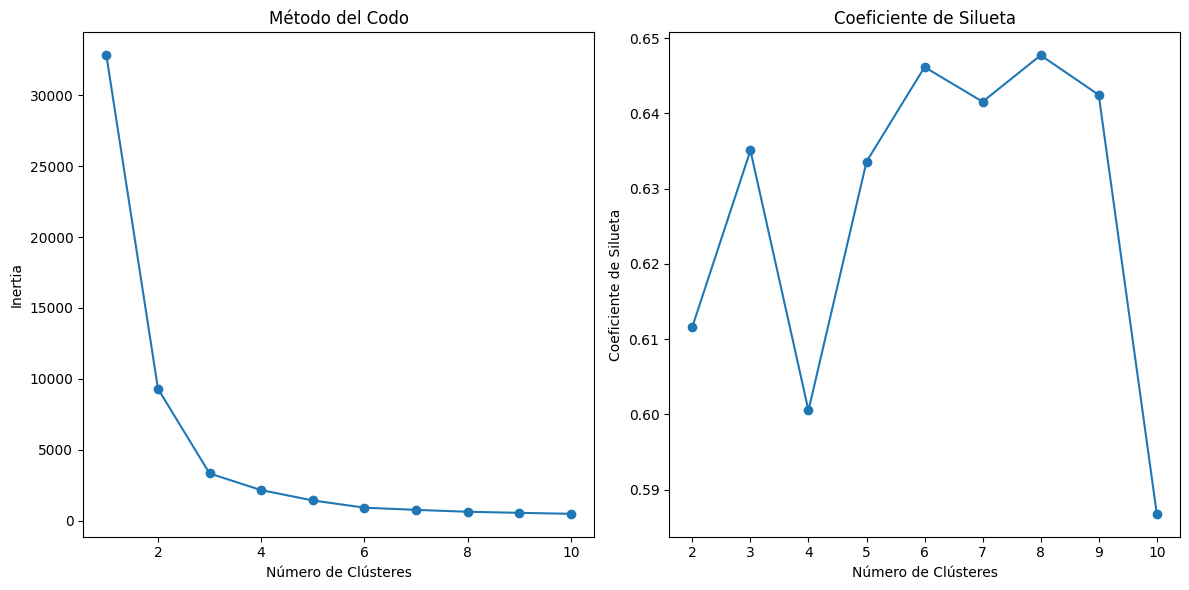

In [23]:
#se calcula método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

#coeficiente de silueta
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette.append(silhouette_score(df, labels))

#visualización
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inertia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


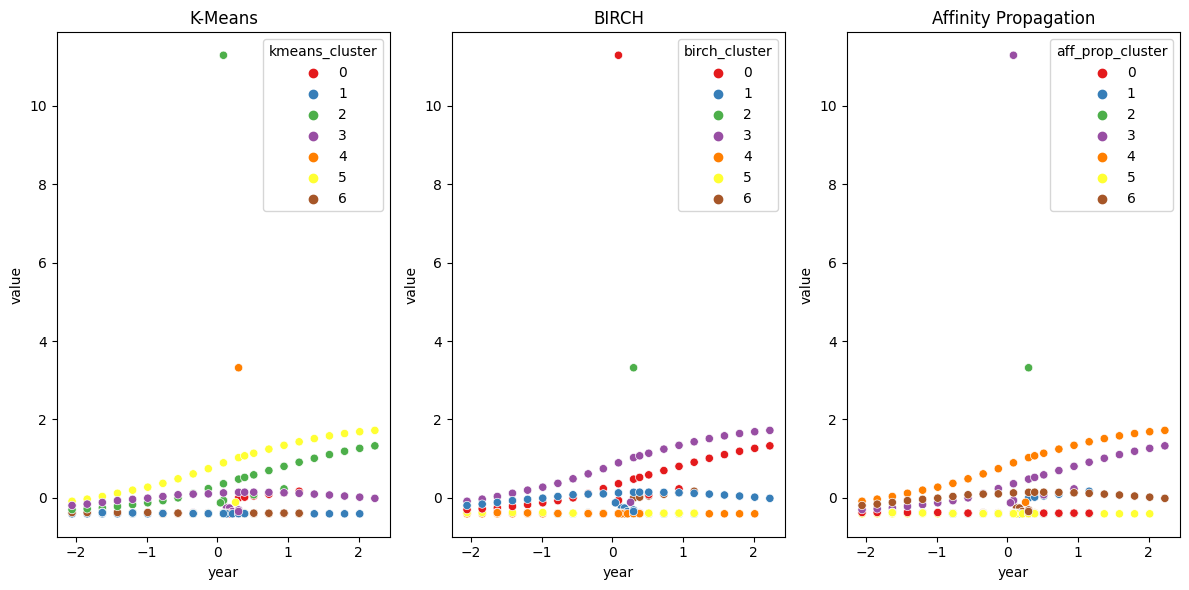

In [24]:
#De los graficos podemos observar que el k optimo es 7 ya que en el metodo del codo es cuando se empieza a aplanar y en la silueta es uno de los maximos
#K means
clusters = 7  #con k optimo
kmeans = KMeans(n_clusters=clusters, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(df)

#birch
birch = Birch(n_clusters=clusters) #con k optimo
df["birch_cluster"] = birch.fit_predict(df)

#Affinity Propagation
aff_prop = AffinityPropagation()
df["aff_prop_cluster"] = aff_prop.fit_predict(df)

#Visualización
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="year", y="value", hue="kmeans_cluster", palette="Set1")
plt.title("K-Means")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="year", y="value", hue="birch_cluster", palette="Set1")
plt.title("BIRCH")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="year", y="value", hue="aff_prop_cluster", palette="Set1")
plt.title("Affinity Propagation")

plt.tight_layout()
plt.show()




6. Evalúe los modelos de clustering resultantes utilizando el Coeficiente de Silueta.

In [26]:
#Evaluación con coeficiente de silueta
silhouette_kmeans = silhouette_score(df.drop(["kmeans_cluster", "birch_cluster", "aff_prop_cluster"], axis=1), df["kmeans_cluster"])
silhouette_birch = silhouette_score(df.drop(["kmeans_cluster", "birch_cluster", "aff_prop_cluster"], axis=1), df["birch_cluster"])
silhouette_aff_prop = silhouette_score(df.drop(["kmeans_cluster", "birch_cluster", "aff_prop_cluster"], axis=1), df["aff_prop_cluster"])

print(f"Coeficiente de Silueta para K means: {silhouette_kmeans}")
print(f"Coeficiente de Silueta para BIRCH: {silhouette_birch}")
print(f"Coeficiente de Silueta para Affinity Propagation: {silhouette_aff_prop}")

Coeficiente de Silueta para K means: 0.5569592425799145
Coeficiente de Silueta para BIRCH: 0.5568101024791702
Coeficiente de Silueta para Affinity Propagation: 0.5569592425799145


7. Documente y compare los resultados de los algoritmos y genere conclusiones
(incluya al menos cuatro conclusiones importantes).


> 1. Los algoritmos de clustering muestran resutados similares con una consistencia notable en la calidad de la agrupación, son relativamente altos por lo que es una señal positiva de que los algoritmos han logrado una buena segmentación de tus datos en clústeres.

> 2. Es fundamental encontrar un número de clústeres adecuado para los algoritmos con el fin de obtener la mejor agrupación posible.

> 3. Interpretar lo que significan los grupos es clave para extraer información útil de los resultados del clustering.

> 4. El coeficiente de silueta da una idea sobre la calidad de la agrupación, pero no debería ser la única referencia. Aplicar otra metricas podría validar los resultados. Por ejemplo, la inercia.

8. Incluya referencias bibliográficas en formato APA.



> Brownlee, J. (2020). 10 Clustering Algorithms With Python. Recuperado de https://machinelearningmastery.com/clustering-algorithms-with-python/

>Verma, Y (2021). Guide To BIRCH Clustering Algorithm(With Python Codes). Recuperado de https://analyticsindiamag.com/guide-to-birch-clustering-algorithmwith-python-codes/#:~:text=BIRCH%20is%20a%20scalable%20clustering,structured%20summary%20to%20create%20clusters.

